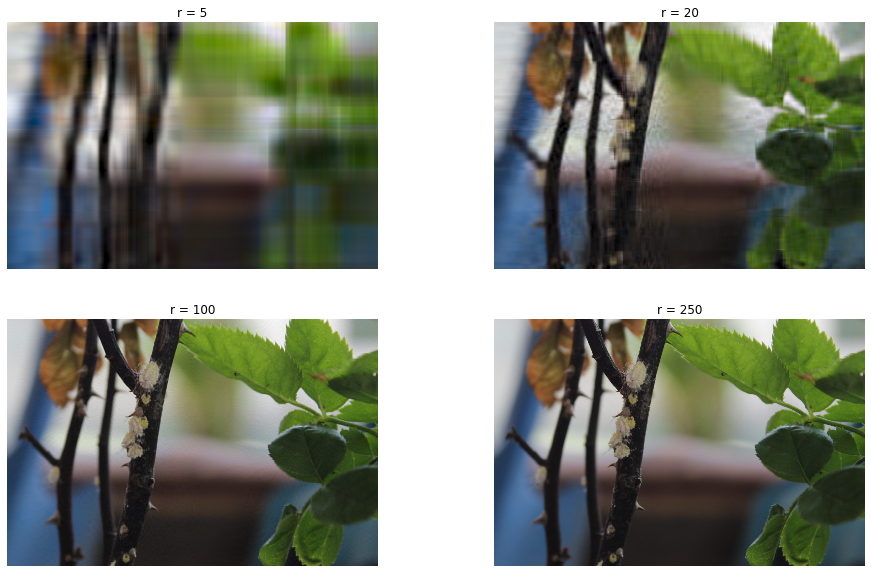

In [1]:
import numpy as np
from matplotlib import animation
from matplotlib.image import imread
import matplotlib.pyplot as plt
from skimage import color

def im2double(im, min_val, max_val):    
    return (im.astype('float') - min_val) / (max_val - min_val)

img = imread('mealybugs.jpg')
img = color.rgb2lab(img)

## Compute SVD
U_l, S_l, VT_l = np.linalg.svd(img[:,:,0], full_matrices=False)
U_a, S_a, VT_a = np.linalg.svd(img[:,:,1], full_matrices=False)
U_b, S_b, VT_b = np.linalg.svd(img[:,:,2], full_matrices=False)

S_l = np.diag(S_l)
S_a = np.diag(S_a)
S_b = np.diag(S_b)

plt.figure(figsize=(16,10))

j = 1
for r in (5, 20, 100, 250):
    # Construct approximate image
    img_l_approx = U_l[:,:r] @ S_l[:r,:r] @ VT_l[:r,:]
    img_a_approx = U_a[:,:r] @ S_a[:r,:r] @ VT_a[:r,:]
    img_b_approx = U_b[:,:r] @ S_b[:r,:r] @ VT_b[:r,:]
    img_approx = np.zeros((img_l_approx.shape[0], img_l_approx.shape[1], 3))
    img_approx[:,:,0] = img_l_approx
    img_approx[:,:,1] = img_a_approx
    img_approx[:,:,2] = img_b_approx
    img_approx = color.lab2rgb(img_approx)
    plt.subplot('22'+str(j))
    j += 1
    plt.title('r = '+str(r))
    plt.axis('off')
    plt.imshow(img_approx)

plt.show()

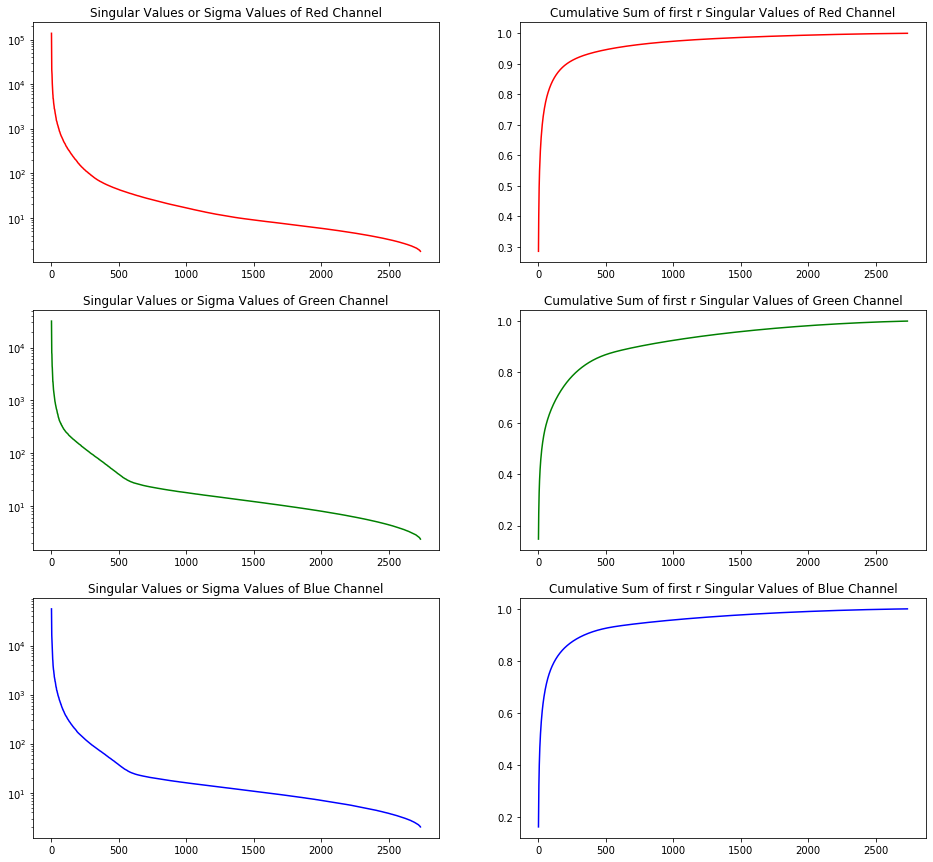

In [2]:
# Plot Sigma and Cumulative energy in first 'r' columns/rows
plt.figure(figsize=(16,15))
plt.subplot('321')
plt.title('Singular Values or Sigma Values of Red Channel')
plt.semilogy(np.diag(S_l), color='r')

plt.subplot('322')
plt.title('Cumulative Sum of first r Singular Values of Red Channel')
plt.plot(np.cumsum(np.diag(S_l))/np.sum(np.diag(S_l)), color='r')

plt.subplot('323')
plt.title('Singular Values or Sigma Values of Green Channel')
plt.semilogy(np.diag(S_a), color='g')

plt.subplot('324')
plt.title('Cumulative Sum of first r Singular Values of Green Channel')
plt.plot(np.cumsum(np.diag(S_a))/np.sum(np.diag(S_a)), color='g')

plt.subplot('325')
plt.title('Singular Values or Sigma Values of Blue Channel')
plt.semilogy(np.diag(S_b), color='b')

plt.subplot('326')
plt.title('Cumulative Sum of first r Singular Values of Blue Channel')
plt.plot(np.cumsum(np.diag(S_b))/np.sum(np.diag(S_b)), color='b')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
MovieWriter stderr:
Unknown encoder 'h264'



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1152x648', '-pix_fmt', 'rgba', '-r', '5', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'img_compress_anim_rgb.mp4']' returned non-zero exit status 1.

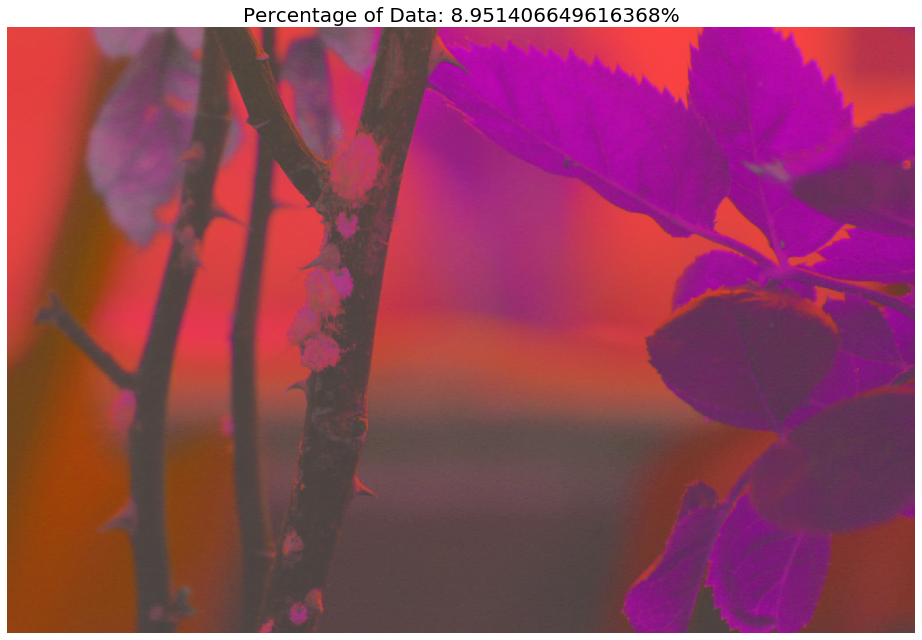

In [3]:
# Generate animation of image compression
# Optimal maximum rank value 'r' can be inferred from plot of Sigma values
# Most of the energy of the image is captured within the first 250 vectors
max_r = 250

def truncate_USV(r):
    img_l_approx = U_l[:,:r] @ S_l[:r,:r] @ VT_l[:r,:]
    img_a_approx = U_a[:,:r] @ S_a[:r,:r] @ VT_a[:r,:]
    img_b_approx = U_b[:,:r] @ S_b[:r,:r] @ VT_b[:r,:]
    img_approx = np.zeros((img_l_approx.shape[0], img_l_approx.shape[1], 3))
    img_approx[:,:,0] = img_l_approx
    img_approx[:,:,1] = img_a_approx
    img_approx[:,:,2] = img_b_approx
    img_approx = im2double(img_approx, np.min(img_approx), np.max(img_approx))
    
    return img_approx

# Animation of image over point of truncation of SVD
fig, ax = plt.subplots(figsize=(16, 9))
title = ax.set_title('Original Image', fontsize=20)
ax.set_axis_off()
im = ax.imshow(img)
fig.tight_layout()

def init():
    im.set_array(img)
    title.set_text('Original Image')
    return [im]

def animate(i):
    im.set_array(truncate_USV(i))
    title.set_text('Percentage of Data: ' + str(i*100/U_l.shape[1]) + '%')
    return [im]

ani = animation.FuncAnimation(fig, animate, np.arange(max_r, 5, -5), init_func=init, blit=True)
ani.save('img_compress_anim_rgb.mp4', fps=5)